# Clustering Analysis

## Introduction

The objective of this project is to enhance the efficiency of the supply chain by clustering similar products together.

To get started, let's import our libraries.

In [1]:
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats
from sklearn.cluster import AgglomerativeClustering

Below is the description of the data, there are a total of 2 columns:
* ADS: Average daily sales of the stock keeping unit
* CV: Coeficiente of variation (volatility of daily sales)

In [4]:
#Load and visualizing the Dataset
df = pd.read_csv("./data/sales.csv")
df.head()

,ADS,CV
0,1,0.68
1,3,0.40
2,1,0.59
3,2,0.39
4,9,0.11


In [5]:
# visualizing the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ADS     100 non-null    int64  
 1   CV      100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [6]:
# visualizing summary statistics
df.describe()

,ADS,CV
count,100.000000,100.000000
mean,5.610000,0.396000
std,4.211324,0.237317
min,1.000000,0.050000
25%,2.000000,0.130000
50%,3.000000,0.400000
75%,10.000000,0.590000
max,14.000000,0.960000


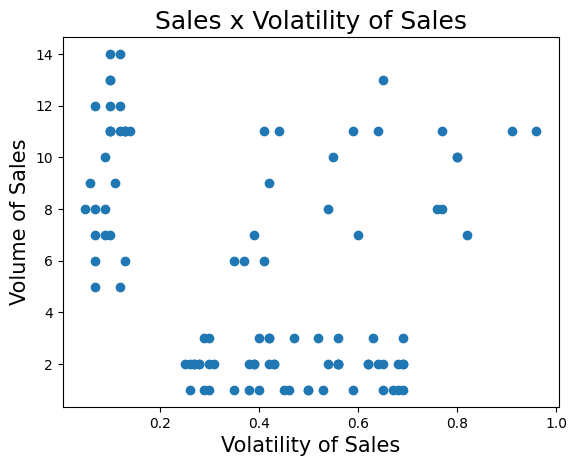

In [7]:
## Let's plot the data
plt.scatter(df['CV'], df['ADS'])
plt.title('Sales x Volatility of Sales', fontsize = 18)
plt.xlabel("Volatility of Sales", fontsize = 15);
plt.ylabel('Volume of Sales', fontsize = 15);

## Scaling and Normalization
Unsupervised learning techniques generally require that the data be apropriately scaled, that means bring the multiples variables to the same scale.
Normalization is one method of scaling, subtracting the mean and dividing by the standard deviation.

In [8]:
# making a copy and normalizing the data
df_zscore = df.copy()
df_zscore = stats.zscore(df_zscore)

## Dendogram
A visual representation of the records and the hierarchy of clusters to which they belong. The dendogram is displayed as a tree, the leaves of the tree correspond to the records and the lenth of the branches indicatesthe degree of dissimilarity between corresponding clusters.
The dendrogram serves as a useful tool for visualizing the clustering process and can aid in selecting the optimal number of clusters

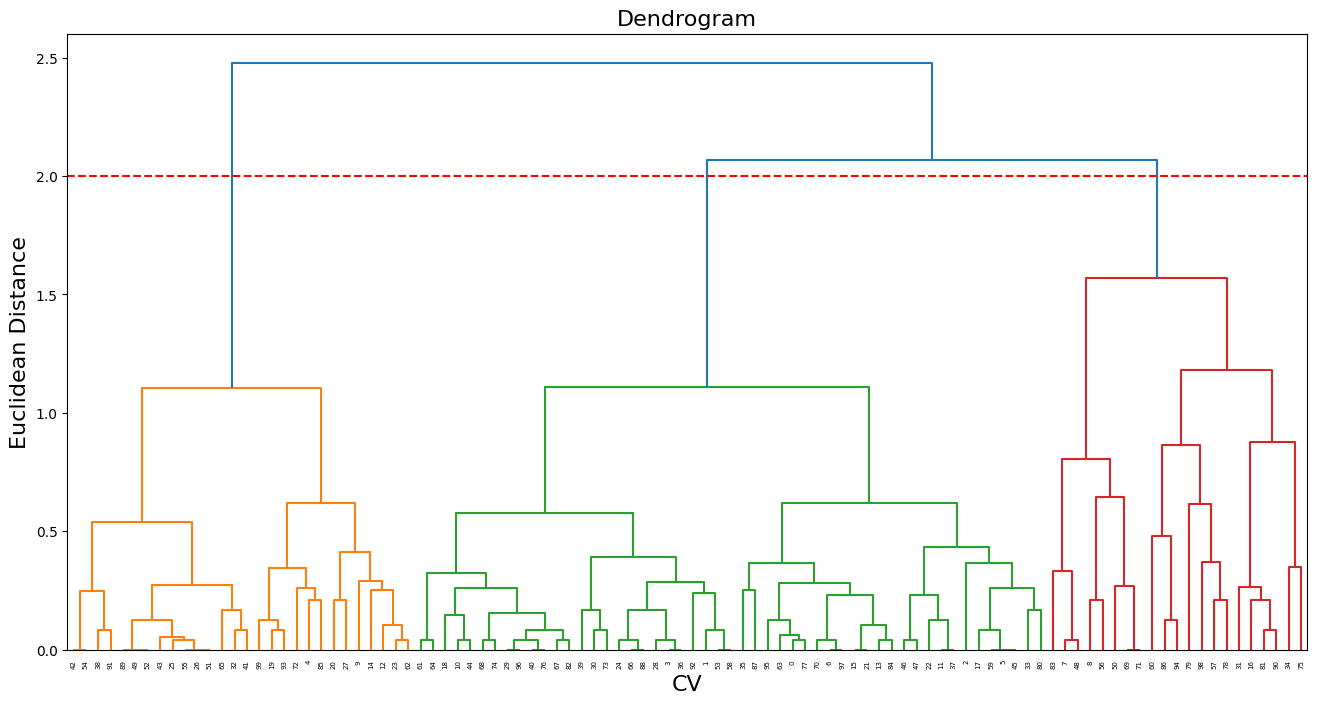

In [9]:
# plot the dendogram
plt.figure(figsize=(16,8))
dendrogram = sch.dendrogram(sch.linkage(df_zscore, method = 'average', metric = 'euclidean'))
plt.title('Dendrogram', fontsize=16)
plt.xlabel('CV', fontsize=16)
plt.ylabel('Euclidean Distance', fontsize=16)
plt.axhline(y = 2, color = 'red', linestyle = '--')
plt.show()

The results indicates 3 groups, the same we choose in the visual analysis. a cluster is defined whre the horizontal line intersect the vertival line.

## Cluster Analysis

After selecting three clusters based on the dendrogram, I will proceed to apply them to the algorithm.

In [10]:
# number of cluster: 3, measure of dissimilarity: euclidean distance, linkage method: average
model_zscore = AgglomerativeClustering(n_clusters=3, metric = "euclidean", linkage = "average")
clusters_zscore = model_zscore.fit_predict(df_zscore)

In [11]:
# insert a column in the dataframe with the group number of each product
df['Cluster_Zscore'] = clusters_zscore

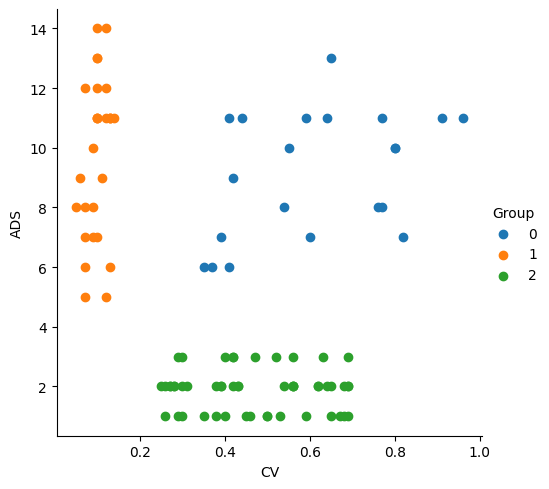

In [12]:
# plotting the scatter plot with the 3 Clusters
g = sb.FacetGrid(data = df, hue = 'Cluster_Zscore', height = 5)
g.map(plt.scatter, 'CV', 'ADS')
g.add_legend(title="Group");

We can identify here three groups of products:
* Group 0: made to order, low sales
* Group 1: make to stock, high sales and low variability
* Group 2: case to case, high sales and high variability

## Conclusion
After performing the clustering analysis, we identified three distinct product groups, making it much simpler to develop supply chain and production strategies for these three groups instead of hundreds of individual products.